In [1]:
!pip install pyswarm

In [1]:
%matplotlib inline

In [2]:
from flask import Flask, request, render_template
import cv2
import numpy as np
from sklearn.cluster import KMeans
from pyswarm import pso
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [3]:
def load_image(image_path, color=True):
    if color:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

In [4]:
def flatten_image(image):
    if len(image.shape) == 3:
        pixels = image.reshape(-1, 3)
    else:
        pixels = image.reshape(-1, 1)
    return pixels

In [5]:
def objective_function(positions, pixels):
    # Reshape the positions to cluster centroids
    if len(pixels[0]) == 3:
        centroids = positions.reshape(-1, 3)
    else:
        centroids = positions.reshape(-1, 1)
    # Assign each pixel to the closest centroid
    labels = KMeans(n_clusters=len(centroids), init=centroids,
                    n_init=1).fit_predict(pixels)
    # Calculate the mean squared error between the original pixels and the centroids
    mse = np.mean((pixels - centroids[labels]) ** 2)
    return mse

In [6]:
def perform_pso_optimization(pixels, num_centroids, num_particles):
    lower_bound = np.zeros(pixels.shape[1] * num_centroids)
    upper_bound = np.ones(pixels.shape[1] * num_centroids) * 255
    result, _ = pso(objective_function, lower_bound,
                    upper_bound, args=(pixels,), swarmsize=num_particles, maxiter=200, debug=True)
    # Reshape the optimized result to get the final centroids
    if pixels.shape[1] == 3:
        centroids = result.reshape(-1, 3)
    else:
        centroids = result.reshape(-1, 1)
    return centroids

In [7]:
def perform_image_segmentation(image_path, num_centroids, num_particles, color=True):
    image = load_image(image_path, color)
    pixels = flatten_image(image)
    centroids = perform_pso_optimization(pixels, num_centroids, num_particles)
    labels = KMeans(n_clusters=len(centroids), init=centroids,
                    n_init=1).fit_predict(pixels)
    if len(image.shape) == 3:
        segmented_image = centroids[labels].reshape(image.shape)
        segmented_image = cv2.cvtColor(
            segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)
    else:
        segmented_image = centroids[labels].reshape(image.shape)
        segmented_image = segmented_image.astype(np.uint8)


    # Display the original and segmented images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('Segmented Image')

    plt.show()


    # return segmented_image

No constraints given.
Best after iteration 1: [141.37406885 108.17201937 213.43568026 192.57419713 248.79169322
 226.89754867 126.65841378 194.12221101 144.47965142 220.94513697
 179.56816296 158.72441198 168.72928595   8.53760394  80.53245401
 129.28023863 119.88068563  30.58638783  92.37828259  22.3795145
 112.68764807  90.63704512 239.761746     8.16903619  10.53029589
  46.46873547  46.43317626 226.4153031  177.35915545 169.41045919
 186.94915727 182.88752609 252.37389928 200.72200837 250.29048859
 205.04273504] 1676.6611617946442
Best after iteration 2: [141.37406885 108.17201937 213.43568026 192.57419713 248.79169322
 226.89754867 126.65841378 194.12221101 144.47965142 220.94513697
 179.56816296 158.72441198 168.72928595   8.53760394  80.53245401
 129.28023863 119.88068563  30.58638783  92.37828259  22.3795145
 112.68764807  90.63704512 239.761746     8.16903619  10.53029589
  46.46873547  46.43317626 226.4153031  177.35915545 169.41045919
 186.94915727 182.88752609 252.37389928 

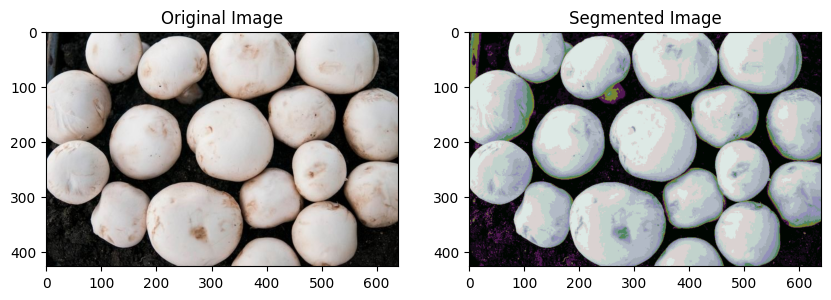

No constraints given.
New best for swarm at iteration 1: [2.55000000e+02 2.35068370e+02 2.55000000e+02 1.98096740e+02
 2.55000000e+02 1.84274397e+02 1.46147784e+02 2.23811959e+02
 1.34745684e+02 1.93462139e+02 2.55000000e+02 1.29218342e+02
 7.74063270e+01 0.00000000e+00 0.00000000e+00 9.20581831e+01
 2.08444304e+02 1.54735955e+02 1.35947093e+02 1.31850791e+01
 6.14430947e+01 1.83661624e+02 1.27945067e+02 1.42974293e+02
 2.91727939e+00 4.23698377e+01 0.00000000e+00 1.96446822e+02
 1.48524526e+02 2.55000000e+02 1.76109857e+00 2.55000000e+02
 1.73565521e+02 0.00000000e+00 2.38369255e+02 1.91991804e+01
 2.10372901e+02 2.32308210e-01 2.55000000e+02] 3458.793898645196
New best for swarm at iteration 1: [121.18426875 152.08862857 218.84359677 197.44871582 255.
 255.          31.88922269 183.74960659 159.32765194 224.32604392
 255.          51.8423509  107.2223577   16.47839863 224.47053061
  43.98709083   0.           2.50089478 141.60717749 255.
   0.          34.51770648  59.94082729 130.42

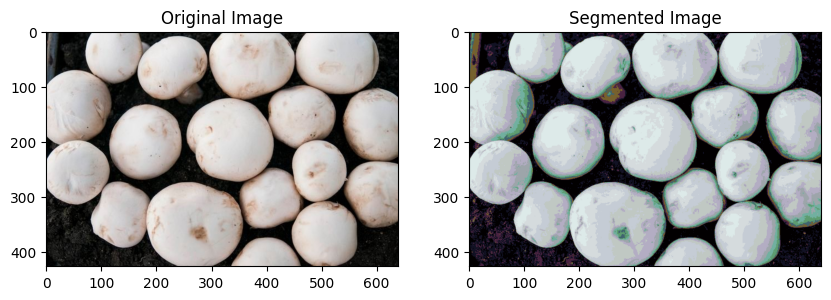

No constraints given.
New best for swarm at iteration 1: [ 70.82467385 147.81792418  60.78016394  67.9258919   51.49594386
 177.08788216 116.52808832 183.68993149 190.9097832    0.
 207.78921049 183.52330455 255.         255.         255.
 134.36971863 172.91103899   0.         159.85285185 232.20052019
 255.         255.         180.11024402  74.13464622   0.
  70.5450205    0.          90.11659152   0.          81.53113418
 245.06419089 255.         245.59154251 199.19627566 141.91877066
 231.1421196   26.87271729   0.          25.15940412 119.5124844
 205.63899126  39.3718672 ] 2396.697482868746
Best after iteration 1: [ 70.82467385 147.81792418  60.78016394  67.9258919   51.49594386
 177.08788216 116.52808832 183.68993149 190.9097832    0.
 207.78921049 183.52330455 255.         255.         255.
 134.36971863 172.91103899   0.         159.85285185 232.20052019
 255.         255.         180.11024402  74.13464622   0.
  70.5450205    0.          90.11659152   0.          81.5311341

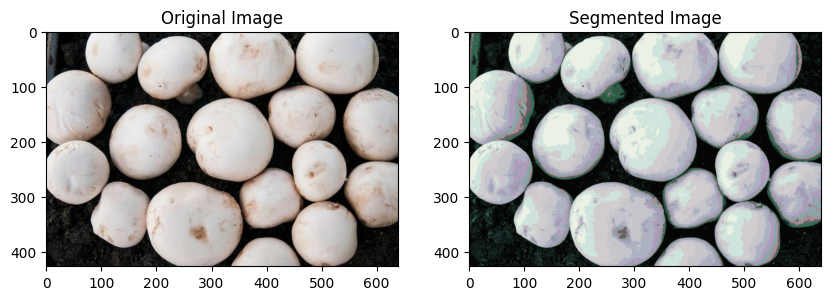

Execution time with 12 centroids and 144 particles: 4194.43 seconds
Execution time with 13 centroids and 169 particles: 3652.30 seconds
Execution time with 14 centroids and 256 particles: 5636.07 seconds


In [8]:
import time

times = []
parameters = [
    {'num_centroids': 12, 'num_particles': 144},
    {'num_centroids': 13, 'num_particles': 169},
    {'num_centroids': 14, 'num_particles': 256}
]

for params in parameters:
    start_time = time.time()
    perform_image_segmentation(image_path='static\mushrooms0.jpg', **params, color=True)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

# Print the recorded times
for i, t in enumerate(times):
    print(f"Execution time with {parameters[i]['num_centroids']} centroids and {parameters[i]['num_particles']} particles: {t:.2f} seconds")